In [2]:
%matplotlib inline

from modsim import *

In [3]:
def make_system(beta, gamma):
    init = State(S=999999, I=1, Z=0)
    init /= np.sum(init)

    t0 = 0
    t_end = 7 * 52


    return System(init=init, t0=t0, t_end=t_end,
                  beta=beta, gamma=gamma)

In [4]:
def plot_results(S, I, Z):
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(Z, ':', color='green', label='Zombie')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')

In [5]:
def calc_total_infected(system):
    frame = system.results
    return frame.S[system.t0] - frame.S[system.t_end]

In [6]:
def run_simulation(system, update_func):
    
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.loc[t0] = init
    
    for i in linrange(t0, t_end):
        frame.loc[i+1] = update_func(frame.loc[i], system)
    
    system.results = frame

In [7]:
def update1(state, system):
    
    unpack(system)
    
    s, i, z = state

    infected = beta * z * s    
    zombie = gamma * i
    
    s -= infected
    i += infected - zombie
    z += zombie
    
    return State(S=s, I=i, Z=z)

In [8]:
system = make_system(0.1, 0.1)
run_simulation(system, update1)
system.results.head()

,S,I,Z
0,0.999999,1.000000e-06,0.000000e+00
1,0.999999,9.000000e-07,1.000000e-07
2,0.999999,8.200000e-07,1.900000e-07
3,0.999999,7.570000e-07,2.720000e-07
4,0.999999,7.084999e-07,3.477000e-07


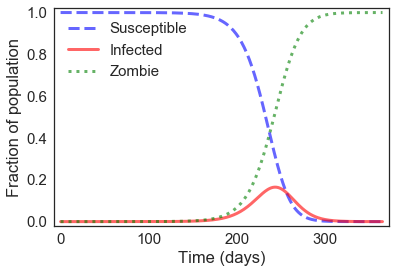

In [9]:
frame = system.results
plot_results(frame.S, frame.I, frame.Z)